# Checking microglial marker

Checking microglial markers of datasets

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
adata1 = sc.read_h5ad('/mnt/data/mit_pfc_mathysCell2023/PFC_micro.h5ad')
adata2 = sc.read_h5ad('/mnt/data/seaad_dlpfc/seaad_microglia.h5ad') #/mnt/data/seaad_dlpfc/seaad_microglia.h5ad

In [3]:
print(adata1.obs.columns)
print(adata2.obs.columns)

Index(['projid', 'individualID_x', 'cell_type_high_resolution',
       'major_cell_type', 'barcode', 'batch', 'chemistry', 'individualID_y',
       'individualID', 'individualIdSource', 'species', 'sex', 'subject',
       'Study', 'msex', 'educ', 'race', 'spanish', 'apoe_genotype',
       'age_at_visit_max', 'age_first_ad_dx', 'age_death',
       'cts_mmse30_first_ad_dx', 'cts_mmse30_lv', 'pmi', 'braaksc', 'ceradsc',
       'cogdx', 'dcfdx_lv', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes',
       'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt',
       'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo',
       'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier',
       'mt_outlier', 'n_genes', 'doublet_scores', 'predicted_doublets',
       'celltypist_cell_label', 'celltypist_conf_score',
       'celltypist_simplified'],
      dtype='object')
Index(['sample_id', 'Ne

In [4]:
adata2.obs.columns

Index(['sample_id', 'Neurotypical reference', 'Donor ID', 'Organism',
       'Brain Region', 'Sex', 'Gender', 'Age at Death', 'Race (choice=White)',
       'Race (choice=Black_ African American)',
       ...
       'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb',
       'pct_counts_hb', 'n_genes', 'doublet_scores', 'predicted_doublets',
       'doublet_label', 'outlier', 'mt_outlier'],
      dtype='object', length=152)

In [5]:
# Define a list of canonical microglial markers
microglia_markers = [
    "CX3CR1", "P2RY12", "TMEM119", "C1QA", "C1QB", "C1QC",
    "TREM2", "CSF1R", "SPI1", "APOE"
]

# Function to extract marker expression
def check_markers(adata, markers, n=5):
    # keep only genes present in the object
    genes_present = [g for g in markers if g in adata.var_names]
    print(f"Checking {len(genes_present)} markers in this dataset: {genes_present}")
    
    # Show average expression per marker
    expr = adata[:, genes_present].X
    if hasattr(expr, "toarray"):  # handle sparse matrix
        expr = expr.toarray()
    df = pd.DataFrame(expr, columns=genes_present)
    print(df.mean().sort_values(ascending=False).head(n))
    
    # Return for further use
    return df

print("=== adata1 (PFC_micro) ===")
df1 = check_markers(adata1, microglia_markers)

print("\n=== adata2 (seaad_microglia) ===")
df2 = check_markers(adata2, microglia_markers)


=== adata1 (PFC_micro) ===
Checking 10 markers in this dataset: ['CX3CR1', 'P2RY12', 'TMEM119', 'C1QA', 'C1QB', 'C1QC', 'TREM2', 'CSF1R', 'SPI1', 'APOE']
CSF1R     2.227285
P2RY12    1.557892
APOE      1.179158
C1QB      0.838613
CX3CR1    0.772836
dtype: float32

=== adata2 (seaad_microglia) ===
Checking 10 markers in this dataset: ['CX3CR1', 'P2RY12', 'TMEM119', 'C1QA', 'C1QB', 'C1QC', 'TREM2', 'CSF1R', 'SPI1', 'APOE']
CSF1R     3.584521
P2RY12    2.893840
APOE      2.730310
C1QB      2.052174
C1QC      1.483164
dtype: float32


/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


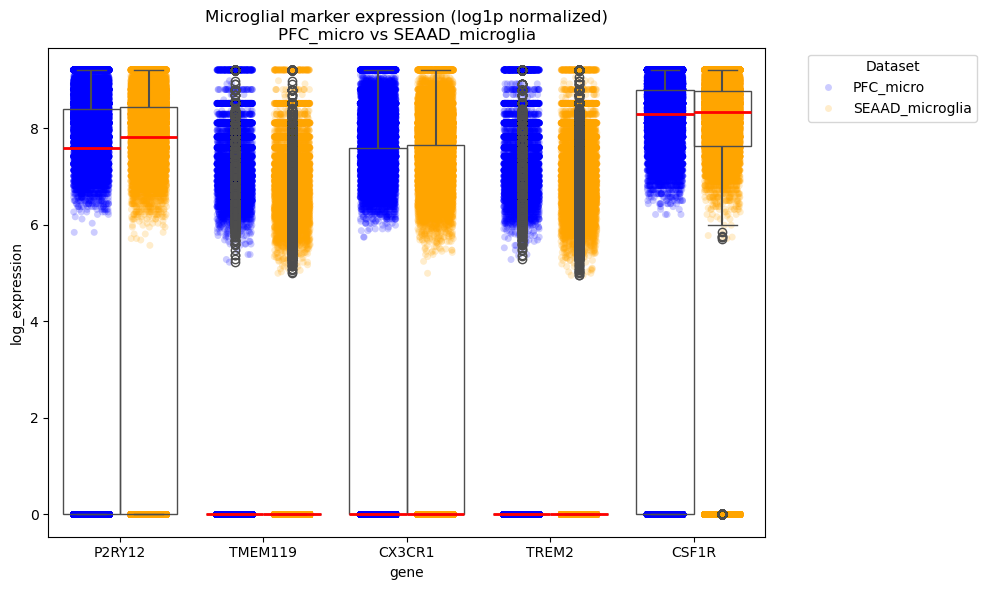

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [10]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ---- Helper to extract marker expression consistently ----
def extract_expr(adata, markers, dataset_name):
    genes = [g for g in markers if g in adata.var_names]
    tmp = adata[:, genes].copy()
    # Normalize & log1p so both datasets are comparable
    sc.pp.normalize_total(tmp, target_sum=1e4)
    sc.pp.log1p(tmp)
    df = tmp.to_df()
    df = df.melt(var_name="gene", value_name="log_expression")
    df["dataset"] = dataset_name
    return df

# ---- Choose your markers ----
markers = ["P2RY12", "TMEM119", "CX3CR1", "TREM2", "CSF1R"]

# ---- Extract for both datasets ----
df1 = extract_expr(adata1, markers, "PFC_micro")
df2 = extract_expr(adata2, markers, "SEAAD_microglia")

# ---- Combine ----
expr_long = pd.concat([df1, df2], ignore_index=True)

# ---- Plot side-by-side ----
plt.figure(figsize=(10,6))

# Define palette: one color per dataset
palette = {"PFC_micro": "blue", "SEAAD_microglia": "orange"}

# Stripplot (dots = cells), colored by dataset
sns.stripplot(
    data=expr_long, x="gene", y="log_expression", 
    hue="dataset", dodge=True, jitter=0.25, alpha=0.2,
    palette=palette, zorder=1
)

# Boxplot overlay, colored by dataset
sns.boxplot(
    data=expr_long, x="gene", y="log_expression", 
    hue="dataset", dodge=True,
    showcaps=True, 
    boxprops={"facecolor": "none"},   # hollow box
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "red", "linewidth": 2},
    palette=palette, zorder=2
)

plt.title("Microglial marker expression (log1p normalized)\nPFC_micro vs SEAAD_microglia")

# Fix duplicate legends from stripplot + boxplot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Dataset", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10,6))


/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/home/ubuntu/miniconda3/envs/scvi-env/lib/python3.12/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)


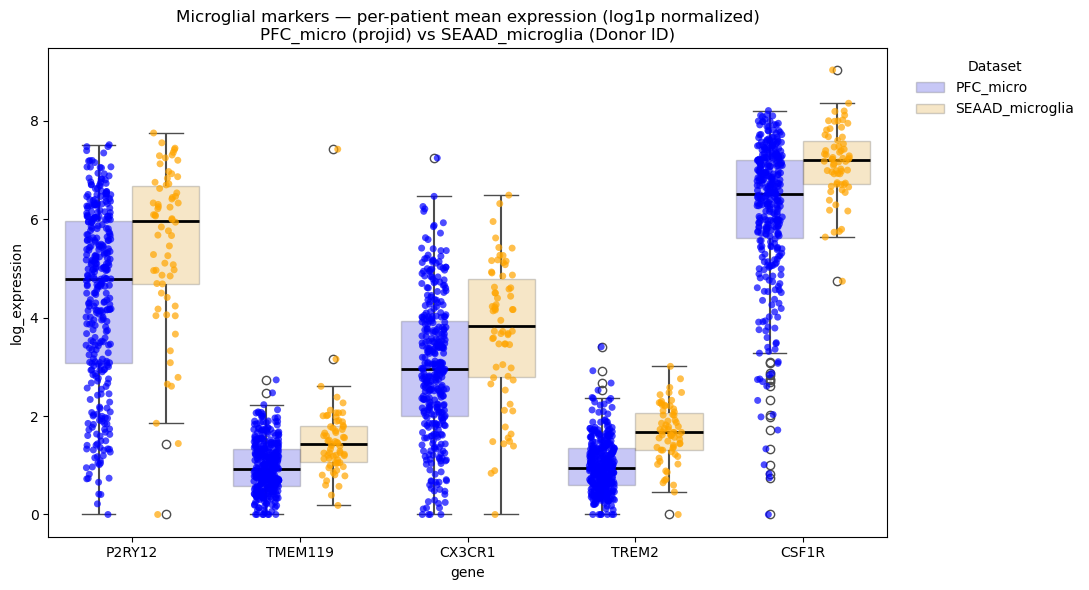

In [9]:


# ---- Helper: extract per-patient means for a gene list (consistent normalization) ----
def per_patient_means(adata, markers, dataset_name, groupby=None, target_sum=1e4):
    genes = [g for g in markers if g in adata.var_names]
    if len(genes) == 0:
        raise ValueError("None of the provided markers were found in var_names.")
    if groupby is None:
        groupby = pick_groupby(adata)
    # subset & normalize consistently
    tmp = adata[:, genes].copy()
    sc.pp.normalize_total(tmp, target_sum=target_sum)
    sc.pp.log1p(tmp)
    df = tmp.to_df()
    if groupby is not None:
        df[groupby] = adata.obs[groupby].astype(str).values
        # per-patient means (one row per patient per gene)
        df_means = (
            df.groupby(groupby, as_index=False)[genes]
              .mean()
              .melt(id_vars=[groupby], var_name="gene", value_name="log_expression")
        )
        df_means.rename(columns={groupby: "patient"}, inplace=True)
    else:
        # no group column found: treat all cells as one "patient"
        df_means = df[genes].mean(axis=0).reset_index()
        df_means.columns = ["gene", "log_expression"]
        df_means["patient"] = "all_cells"
    df_means["dataset"] = dataset_name
    return df_means, groupby


# ---- Extract per-patient means with explicit groupby ----
df1, _ = per_patient_means(adata1, markers, "PFC_micro", groupby="projid")
df2, _ = per_patient_means(adata2, markers, "SEAAD_microglia", groupby="Donor ID")
expr_pat = pd.concat([df1, df2], ignore_index=True)

# ---- Plot: one dot per patient ----
plt.figure(figsize=(11, 6))
palette = {"PFC_micro": "blue", "SEAAD_microglia": "orange"}

# Dots = each patient mean per gene
sns.stripplot(
    data=expr_pat, x="gene", y="log_expression",
    hue="dataset", dodge=True, jitter=0.15, alpha=0.7,
    palette=palette, zorder=2
)

# Boxes = distribution of patient means
sns.boxplot(
    data=expr_pat, x="gene", y="log_expression",
    hue="dataset", dodge=True,
    showcaps=True, boxprops={"alpha": 0.25},
    whiskerprops={"linewidth": 1.5},
    medianprops={"color": "black", "linewidth": 2},
    palette=palette, zorder=1
)

plt.title("Microglial markers — per-patient mean expression (log1p normalized)\nPFC_micro (projid) vs SEAAD_microglia (Donor ID)")

# Clean legend (remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))  # preserve one handle per label
plt.legend(unique.values(), unique.keys(),
           title="Dataset", bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

plt.tight_layout()
plt.show()


# UMAP

In [ ]:

GENE = "CSF1R"   # for mouse datasets this might be "Csf1r"

def ensure_umap(adata, n_neighbors=15, n_pcs=50):
    if "X_umap" not in adata.obsm:
        if "X_pca" not in adata.obsm:
            sc.pp.pca(adata, n_comps=min(n_pcs, adata.n_vars-1))
        sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=min(n_pcs, adata.obsm["X_pca"].shape[1]))
        sc.tl.umap(adata)

def pick_gene_name(adata, gene):
    # case-insensitive match for convenience
    lower = {g.lower(): g for g in adata.var_names}
    return lower.get(gene.lower(), None)

def extract_expr(adata, gene):
    """Returns 1D np.array of expression for gene (prefers .raw if present)."""
    g = pick_gene_name(adata, gene)
    if g is None:
        raise ValueError(f"Gene '{gene}' not found in var_names for this AnnData.")
    # prefer raw if available
    if adata.raw is not None and g in adata.raw.var_names:
        X = adata.raw[:, g].X
    else:
        X = adata[:, g].X
    if hasattr(X, "toarray"):
        X = X.toarray()
    X = np.ravel(X)
    return X

# 1) Make sure both have UMAPs
ensure_umap(adata1)
ensure_umap(adata2)

# 2) Get expression vectors (log1p-transform for visualization)
x1 = np.log1p(extract_expr(adata1, GENE))
x2 = np.log1p(extract_expr(adata2, GENE))

# Put into .obs temp columns for plotting
adata1.obs["_expr_log1p"] = x1
adata2.obs["_expr_log1p"] = x2

# 3) Shared color scale (e.g., 99th percentile to avoid outliers)
vmin = 0.0
vmax = float(np.nanpercentile(np.concatenate([x1, x2]), 99))

# 4) Side-by-side UMAPs
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sc.pl.umap(
    adata1, color="_expr_log1p", vmin=vmin, vmax=vmax,
    color_map="viridis", ax=axes[0], show=False
)
axes[0].set_title(f"adata1 • {GENE} log1p")

sc.pl.umap(
    adata2, color="_expr_log1p", vmin=vmin, vmax=vmax,
    color_map="viridis", ax=axes[1], show=False
)
axes[1].set_title(f"adata2 • {GENE} log1p")

plt.tight_layout()
plt.show()

# Optional: clean up temp columns later
# del adata1.obs["_expr_log1p"]; del adata2.obs["_expr_log1p"]
